# Stock Market data prediction using Historical Data

## Importing Libraries 

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression,LogisticRegression
import pandas_datareader as web
import numpy as np
import seaborn as sns

# importing the keras libraries and packages

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Training and Testing for Different Stock (TATA STEEL)

# Predict next day's close price (Experimental)

In [100]:
# data_num = pd.read_csv('djia.csv')
data_num = web.DataReader('TATAMOTORS.NS', data_source='yahoo', start='2016-01-01', end='2021-01-14')
data_num.reset_index(level=0, inplace=True)
data_num.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1237,2021-01-08,201.500000,197.100006,198.750000,198.149994,53991568.0,198.149994
1238,2021-01-11,225.399994,199.649994,199.899994,220.649994,182483100.0,220.649994
1239,2021-01-12,252.399994,224.100006,227.000000,237.800003,390577839.0,237.800003
1240,2021-01-13,248.800003,238.399994,242.899994,242.600006,164649387.0,242.600006
1241,2021-01-14,249.800003,238.600006,242.850006,245.100006,86819519.0,245.100006


In [101]:
training_data  = data_num.iloc[:, 3:4]


In [102]:
test = training_data.iloc[0:1,:] 
test.at[0,'Open'] = 246.000000
test.shape
real = test

In [103]:

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range = (0, 1))
training_data = mm.fit_transform(training_data)

In [104]:

# Getting the inputs and outputs

x_train = training_data[0:259]
y_train = training_data[1:260]

print(x_train.shape)
print(y_train.shape)


# reshaping

x_train = np.reshape(x_train, (259, 1, 1))

print(x_train.shape)

(259, 1)
(259, 1)
(259, 1, 1)


In [105]:

# initializing the model
model = Sequential()

# adding the input layer and the LSTM layer
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# adding the output layer
model.add(Dense(units = 1))

# compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting the RNN to the training data
model.fit(x_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
9/9 [==============================] - 1s 1ms/step - loss: 1.4025
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 1.3405
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 1.2666
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 1.2100
Epoch 5/200
9/9 [==============================] - 0s 1ms/step - loss: 1.1254
Epoch 6/200
9/9 [==============================] - 0s 1ms/step - loss: 1.1114
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 1.0444
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 0.9657
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 0.9422
Epoch 10/200
9/9 [==============================] - 0s 1ms/step - loss: 0.8945
Epoch 11/200
9/9 [==============================] - 0s 2ms/step - loss: 0.8397
Epoch 12/200
9/9 [==============================] - 0s 2ms/step - loss: 0.7670
Epoch 13/200
9/9 [==============================] - 0s 2ms/st

9/9 [==============================] - 0s 4ms/step - loss: 0.0148
Epoch 105/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 106/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 107/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 108/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 109/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 110/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 111/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 112/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 113/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 114/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 115/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 116/200
9/9 [==============================] - 0

In [106]:
test = mm.transform(test)
test = np.reshape(test, (1, 1, 1))


predicted_stock_price = model.predict(test)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)

In [107]:
predicted_stock_price

array([[412.97205]], dtype=float32)

In [108]:

import math

from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(real, predicted_stock_price))

print(rmse)

166.9720458984375


In [346]:
openP = data_num.tail(1)['Open']
closeP = data_num.tail(1)['Close']

In [347]:
data_num['NextOpen'] = 0
# data_num['NextClose'] = 0
data_num['NextHigh'] = 0
data_num['NextLow'] = 0

In [348]:
data_num.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,NextOpen,NextHigh,NextLow
255,2021-01-08,37.299999,34.200001,35.150002,37.299999,177607.0,37.299999,0,0,0
256,2021-01-11,40.650002,35.799999,40.000000,38.799999,167869.0,38.799999,0,0,0
257,2021-01-12,40.500000,38.150002,39.750000,38.549999,54458.0,38.549999,0,0,0
258,2021-01-13,39.250000,35.950001,38.549999,36.549999,44392.0,36.549999,0,0,0
259,2021-01-14,39.000000,36.500000,37.799999,37.400002,27101.0,37.400002,0,0,0


In [349]:
for i in range(0, len(data_num) - 1):
    data_num.loc[i, 'NextOpen'] = data_num.loc[i+1, 'Open']   
#     data_num.loc[i, 'NextClose'] = data_num.loc[i+1, 'Close']
    data_num.loc[i, 'NextHigh'] = data_num.loc[i+1, 'High']
    data_num.loc[i, 'NextLow'] = data_num.loc[i+1, 'Low']




In [350]:
data_num

,Date,High,Low,Open,Close,Volume,Adj Close,NextOpen,NextHigh,NextLow
0,2020-01-01,35.500000,34.200001,34.950001,35.000000,2506.0,35.000000,34.349998,37.000000,32.250000
1,2020-01-02,37.000000,32.250000,34.349998,36.000000,4653.0,36.000000,37.400002,39.150002,37.000000
2,2020-01-03,39.150002,37.000000,37.400002,37.849998,3086.0,37.849998,40.950001,41.000000,35.549999
3,2020-01-06,41.000000,35.549999,40.950001,37.299999,3711.0,37.299999,37.549999,38.450001,37.000000
4,2020-01-07,38.450001,37.000000,37.549999,37.750000,7581.0,37.750000,37.950001,39.500000,37.950001
...,...,...,...,...,...,...,...,...,...,...
255,2021-01-08,37.299999,34.200001,35.150002,37.299999,177607.0,37.299999,40.000000,40.650002,35.799999
256,2021-01-11,40.650002,35.799999,40.000000,38.799999,167869.0,38.799999,39.750000,40.500000,38.150002
257,2021-01-12,40.500000,38.150002,39.750000,38.549999,54458.0,38.549999,38.549999,39.250000,35.950001
258,2021-01-13,39.250000,35.950001,38.549999,36.549999,44392.0,36.549999,37.799999,39.000000,36.500000


In [351]:
data_num = data_num[:-1]

In [352]:
data_num

,Date,High,Low,Open,Close,Volume,Adj Close,NextOpen,NextHigh,NextLow
0,2020-01-01,35.500000,34.200001,34.950001,35.000000,2506.0,35.000000,34.349998,37.000000,32.250000
1,2020-01-02,37.000000,32.250000,34.349998,36.000000,4653.0,36.000000,37.400002,39.150002,37.000000
2,2020-01-03,39.150002,37.000000,37.400002,37.849998,3086.0,37.849998,40.950001,41.000000,35.549999
3,2020-01-06,41.000000,35.549999,40.950001,37.299999,3711.0,37.299999,37.549999,38.450001,37.000000
4,2020-01-07,38.450001,37.000000,37.549999,37.750000,7581.0,37.750000,37.950001,39.500000,37.950001
...,...,...,...,...,...,...,...,...,...,...
254,2021-01-07,35.349998,33.299999,35.349998,33.950001,27174.0,33.950001,35.150002,37.299999,34.200001
255,2021-01-08,37.299999,34.200001,35.150002,37.299999,177607.0,37.299999,40.000000,40.650002,35.799999
256,2021-01-11,40.650002,35.799999,40.000000,38.799999,167869.0,38.799999,39.750000,40.500000,38.150002
257,2021-01-12,40.500000,38.150002,39.750000,38.549999,54458.0,38.549999,38.549999,39.250000,35.950001


In [353]:
from sklearn.model_selection import train_test_split

In [384]:
X = data_num.drop(['NextHigh','Date','High','Low','Adj Close','Volume','NextLow'],axis=1)
# X = data_num.drop(['Close','Adj Close'],axis=1)

y = data_num[['NextHigh','NextLow']]
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = LinearRegression()
model.fit(X_train, y_train)
mscore = model.score(X_test,y_test)
mscore

0.9759819434523123

In [355]:
y_pred = model.predict(X_test)

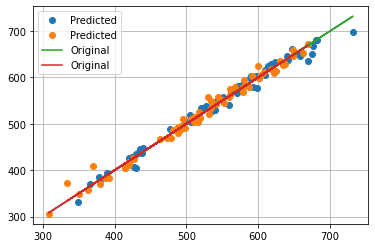

In [340]:
import matplotlib.pyplot as plt
plt.plot(y_test,y_pred,marker='o',linestyle='',label="Predicted")
plt.plot(y_test,y_test, label="Original")

plt.legend(loc='best')
plt.grid()
plt.show()

In [341]:
X_test.tail()

,Open,Close,NextOpen
13,653.000000,637.049988,637.000000
59,350.000000,347.600006,378.000000
0,612.900024,621.650024,621.900024
95,427.700012,416.450012,416.450012
111,498.049988,485.899994,481.700012


In [342]:
nextOpenP = 750.000000
pred = model.predict([[openP,closeP,nextOpenP]]) 

D:\anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [343]:
pred

array([[760.82431492, 741.72117298]])

In [344]:
diff = (nextOpenP * (100-(mscore*100))/100)
print("variance = ",diff)
ph = (pred[0][0]- diff) - nextOpenP
lp = nextOpenP   -  (pred[0][1] + diff )
if ph > lp:
    profit = ph
    print("Profit/Stock  = ",ph)
    print("Buy at :",nextOpenP,'and sell at :',(pred[0][0]) - diff )
else:
    profit = lp
    print("Profit/Stock  = ",lp)
    print("sell at :",nextOpenP,'and buy at :',(pred[0][1]) + diff )

        

variance =  11.757364453389805
Profit/Stock  =  -0.9330495338837181
Buy at : 750.0 and sell at : 749.0669504661163


In [252]:
stock  = int(input("How Many Stocks?\n"))
print("Your Profit is = ",profit * stock)

How Many Stocks?
200
Your Profit is =  9844.035248974615


In [270]:
100000/1295




77.22007722007721

In [271]:
77*25

1925